In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
# Import Dataset
df = pd.read_csv("AABA_2006-01-01_to_2018-01-01.csv")

# Check Dataset

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [35]:
df.size

21133

In [36]:
df.shape

(3019, 7)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0,2.842648e+01,1.325724e+01,9.10,1.617500e+01,27.18,3.665500e+01,7.302000e+01
High,3019.0,2.876653e+01,1.335669e+01,9.48,1.638500e+01,27.49,3.703500e+01,7.325000e+01
Low,3019.0,2.806656e+01,1.315733e+01,8.94,1.597000e+01,26.82,3.630500e+01,7.246000e+01
Close,3019.0,2.841273e+01,1.325816e+01,8.95,1.613000e+01,27.10,3.663500e+01,7.293000e+01
Volume,3019.0,2.158391e+07,1.926231e+07,1939061.00,1.248025e+07,17321301.00,2.512757e+07,4.382317e+08


# Data Preprocessing

In [39]:
# Convert Date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
# Drop "Name" Column as it is not useful in our analysis
df.drop(columns=['Name'], inplace=True)

In [41]:
# Set date as index
df

,Date,Open,High,Low,Close,Volume
0,2006-01-03,39.69,41.22,38.79,40.91,24232729
1,2006-01-04,41.22,41.90,40.77,40.97,20553479
2,2006-01-05,40.93,41.73,40.85,41.53,12829610
3,2006-01-06,42.88,43.57,42.80,43.21,29422828
4,2006-01-09,43.10,43.66,42.82,43.42,16268338
...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877


In [49]:
df.set_index("Date", inplace=True)

In [50]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729
2006-01-04,41.22,41.90,40.77,40.97,20553479
2006-01-05,40.93,41.73,40.85,41.53,12829610
2006-01-06,42.88,43.57,42.80,43.21,29422828
2006-01-09,43.10,43.66,42.82,43.42,16268338


# Data Analysis

### Correlation Matrix

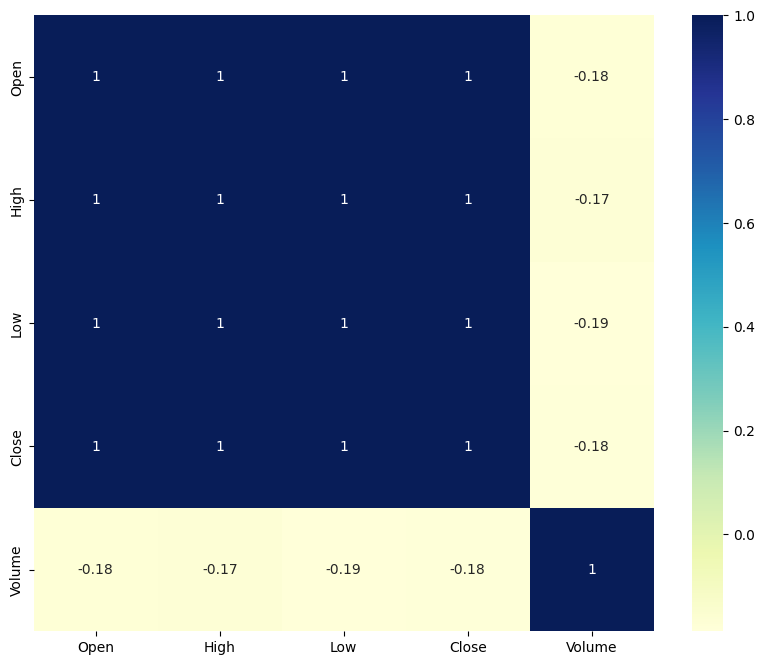

In [73]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

### Distributions

In [146]:
# Check distribution
def dist(df, col):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=365, color='blue', kde=True, edgecolor='black')
    plt.title(f"Distribution of {col} Prices", fontsize=15)
    plt.xlabel("Closing Price", fontsize=12)
    plt.ylabel("Frequency")
    plt.show()

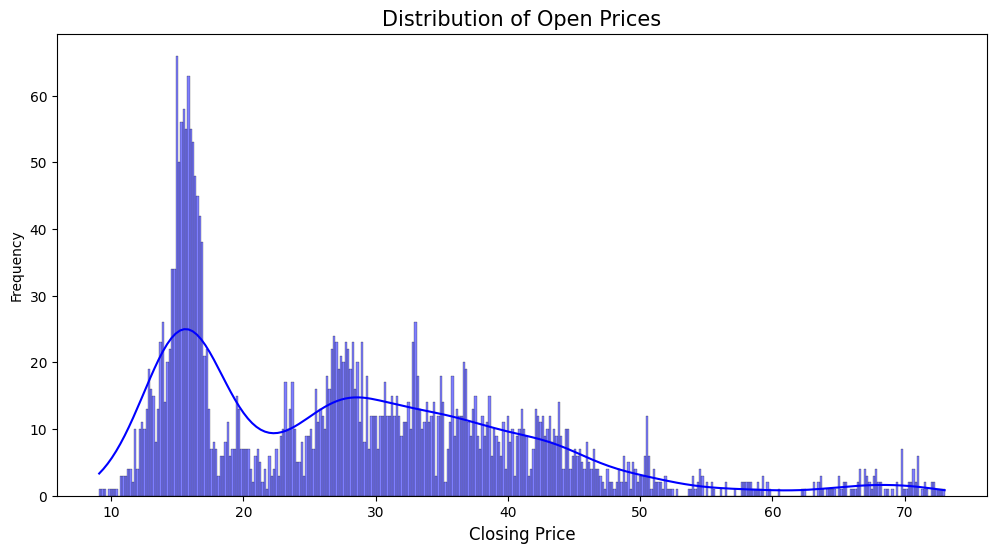

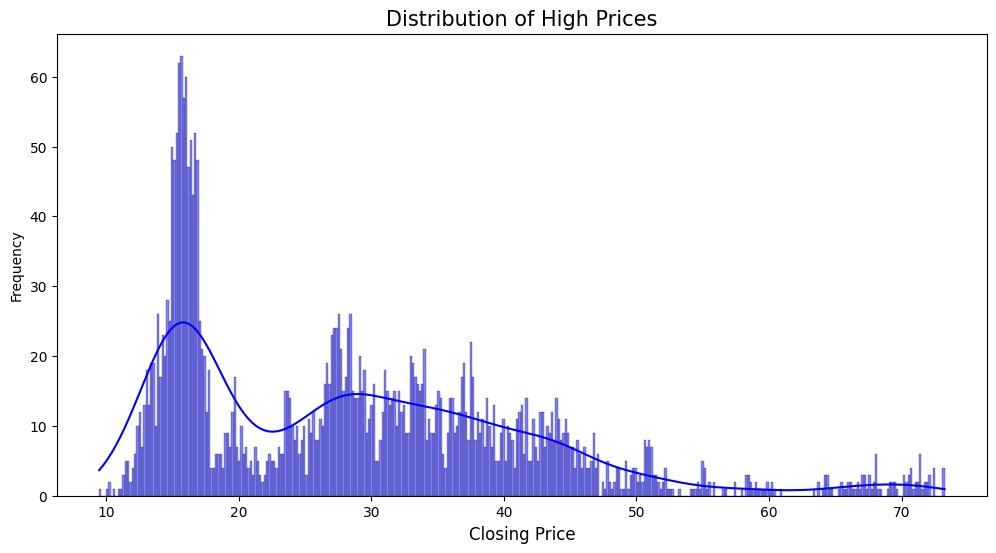

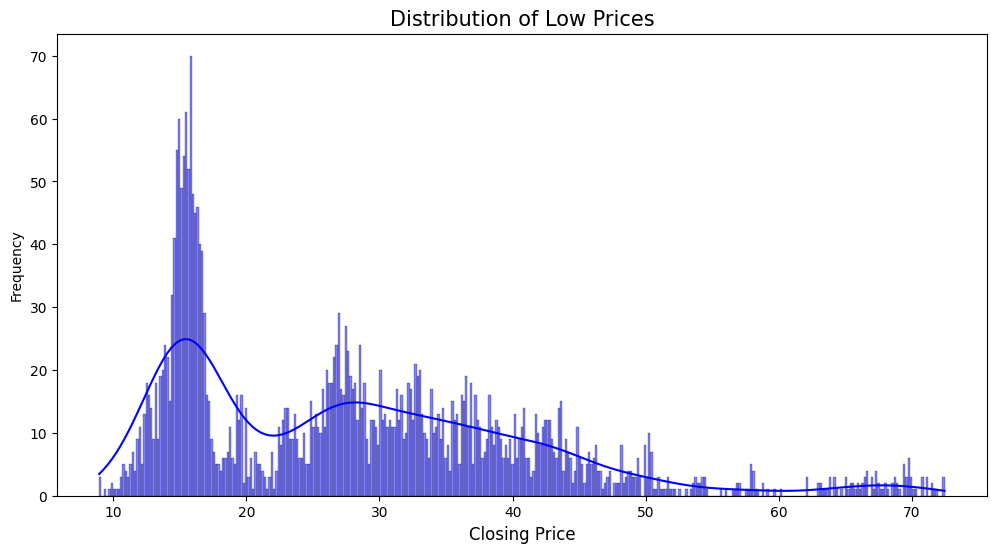

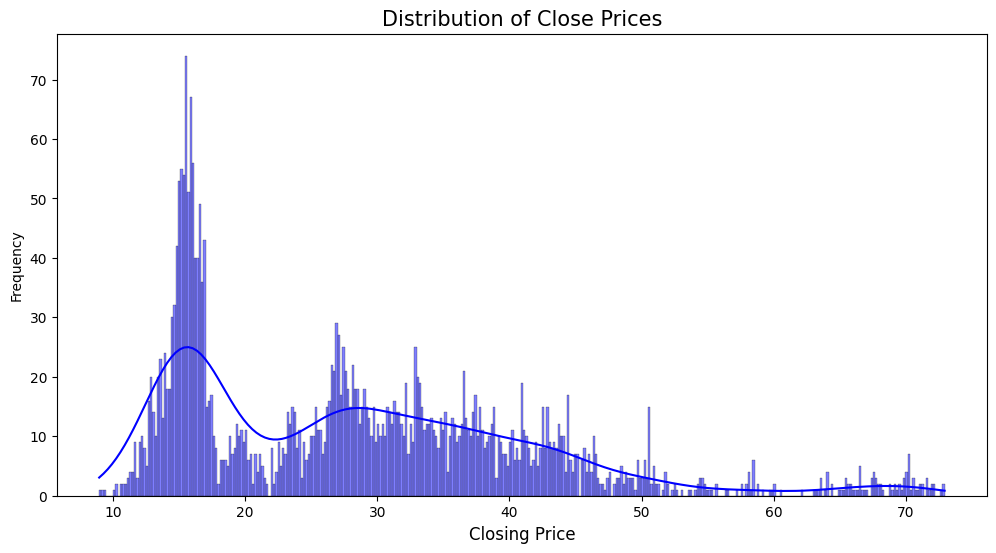

In [148]:
for col in ['Open', 'High', 'Low', 'Close']:
    dist(df, col)

### Prices Over The Time

In [71]:
def price_over_time(df, col):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[col])
    plt.title(f"{col} Price/Volume Over The Time")
    plt.xlabel("Date")
    plt.ylabel(f"{col} Price")
    plt.show()

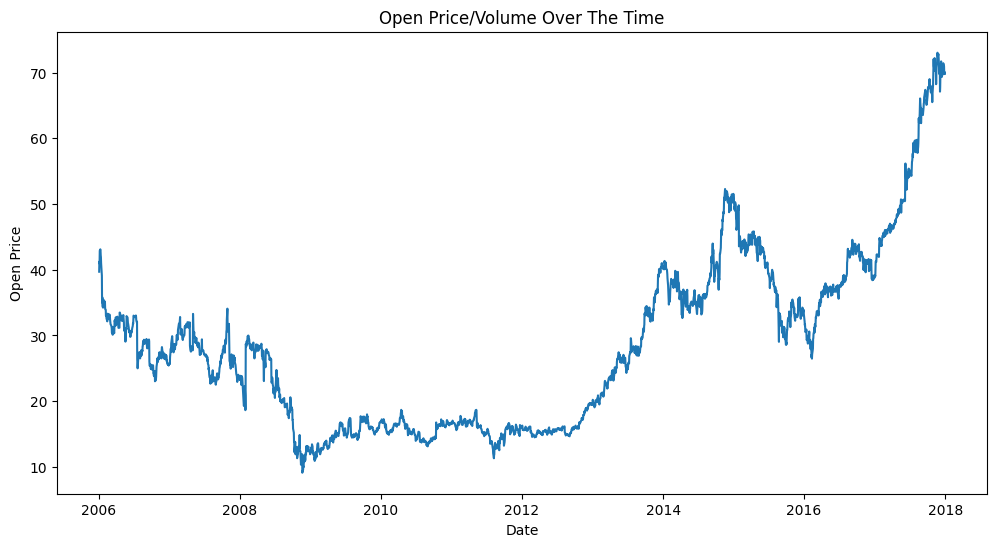

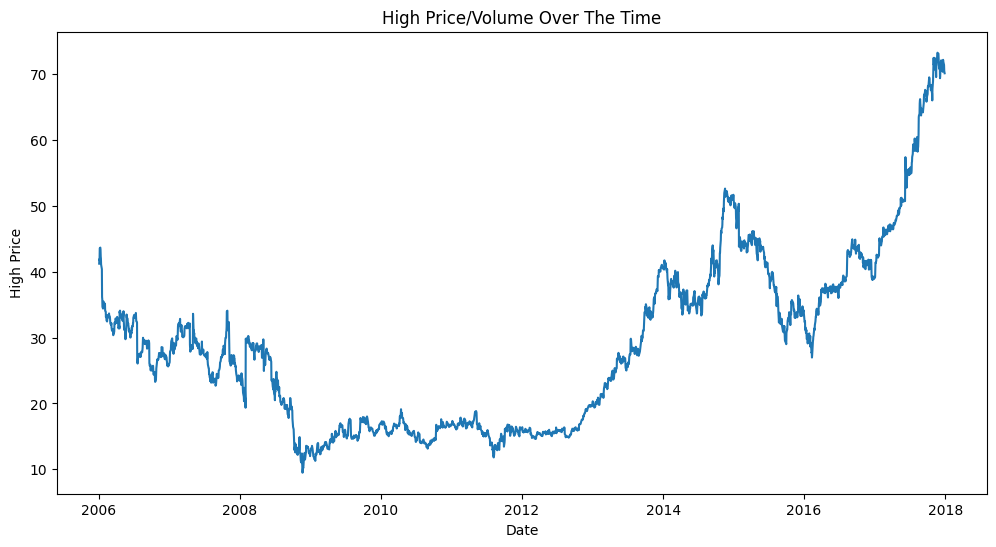

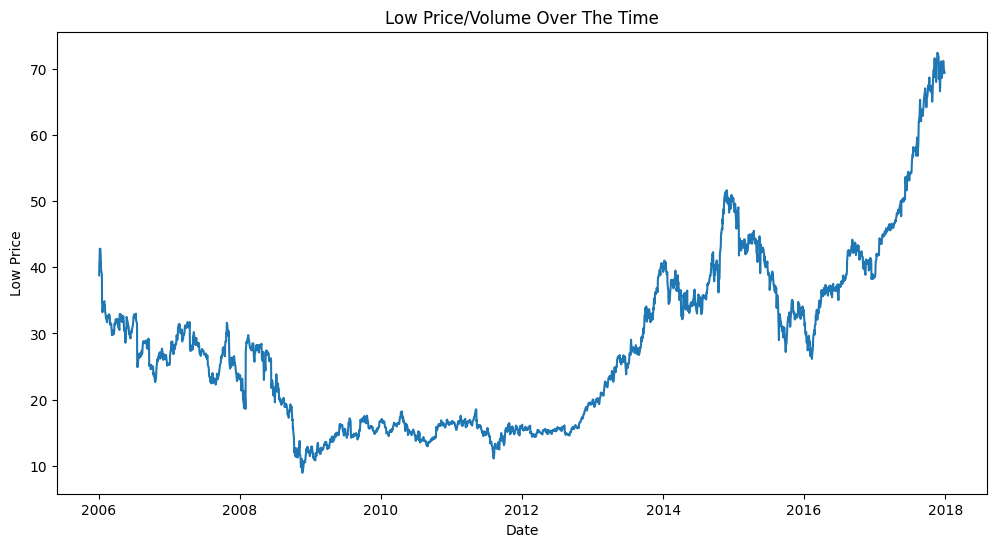

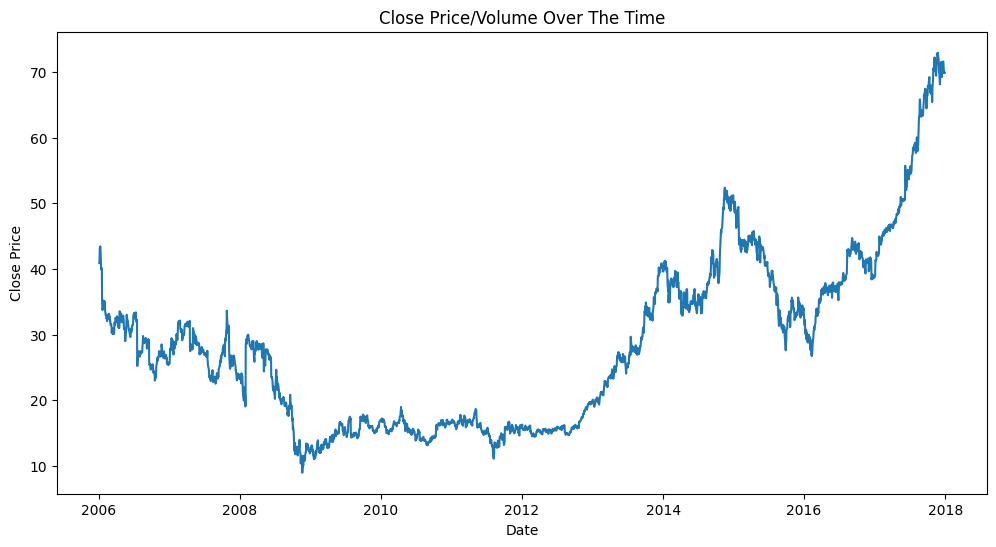

In [72]:
for col in ['Open', 'High', 'Low', 'Close']:
    price_over_time(df, col)

### Boxplots

In [81]:
def boxplot(df, cols):
    plt.figure(figsize=(12, 6))
    plt.boxplot(df[col], showmeans=True, meanline=True)
    plt.title(f"{col} Boxplot")
    plt.show()

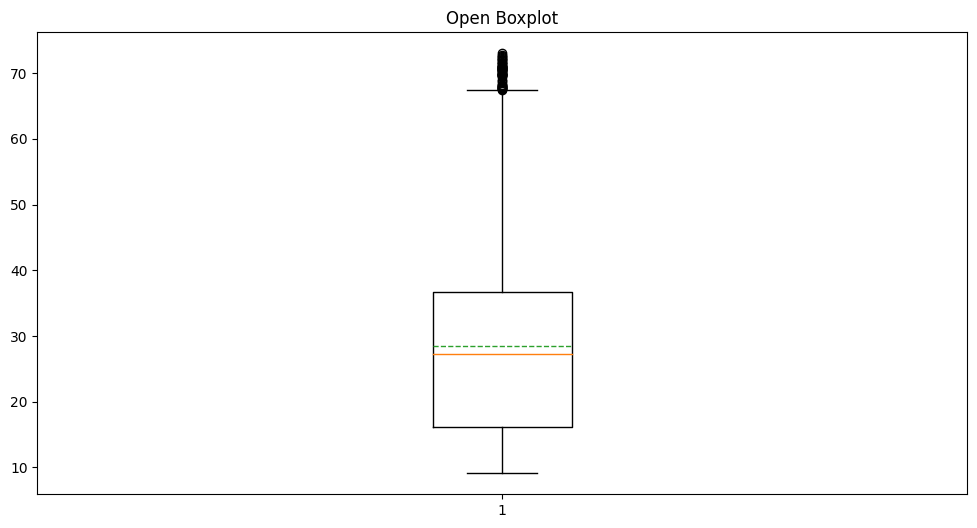

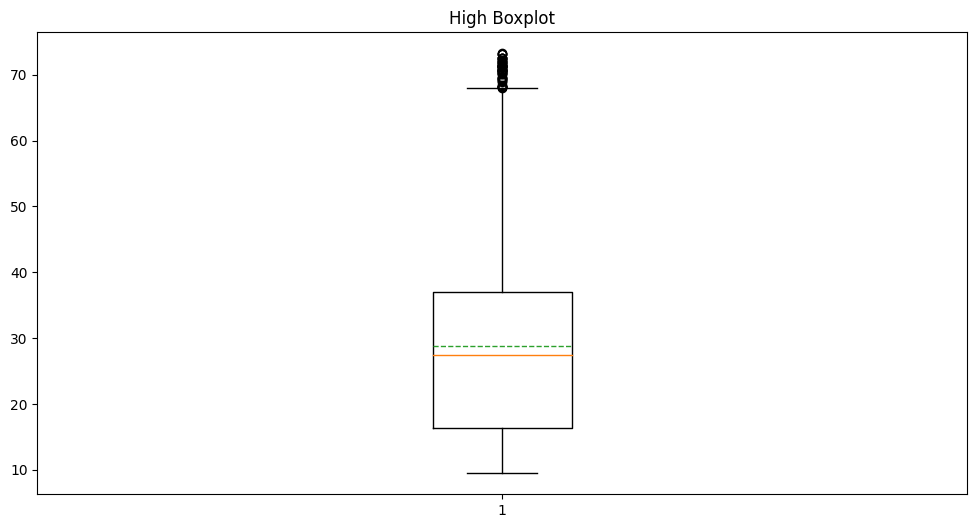

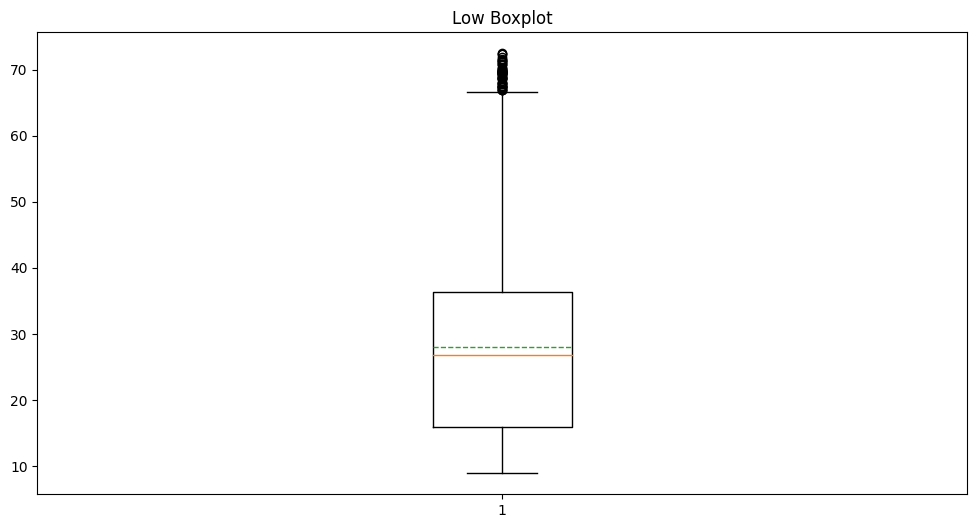

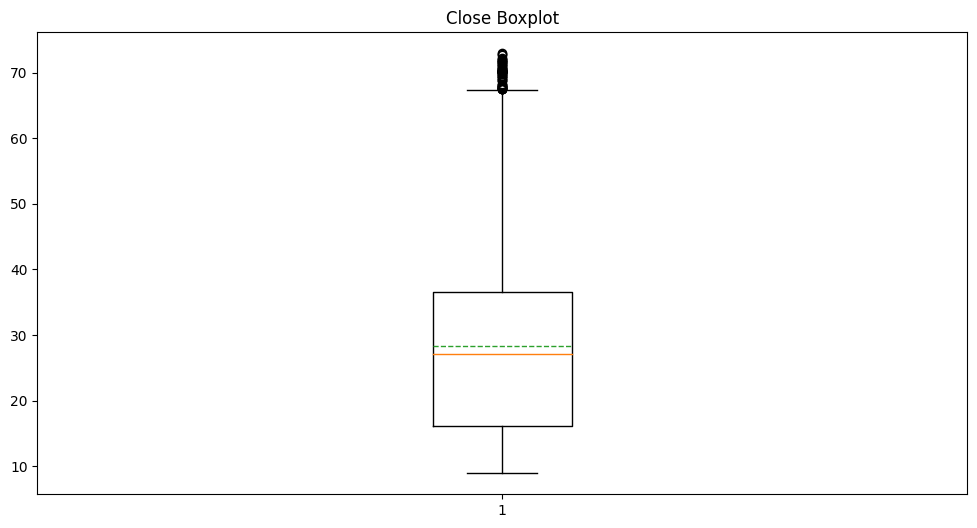

In [82]:
for col in ['Open', 'High', 'Low', 'Close']:
    boxplot(df, col)

### Adding Moving Average (MA50 & MA20)

In [112]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()
df.head(55) # To Check value of "MA_50"

,Open,High,Low,Close,Volume,MA_50,MA_100
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,NaN,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,NaN,NaN
2006-01-05,40.93,41.73,40.85,41.53,12829610,NaN,NaN
2006-01-06,42.88,43.57,42.80,43.21,29422828,NaN,NaN
2006-01-09,43.10,43.66,42.82,43.42,16268338,NaN,NaN
2006-01-10,42.96,43.34,42.34,42.98,16288580,NaN,NaN
2006-01-11,42.19,42.31,41.72,41.87,26192772,NaN,NaN
2006-01-12,41.92,41.99,40.76,40.89,18921686,NaN,NaN
2006-01-13,41.00,41.08,39.62,39.90,30966185,NaN,NaN


### Line Plot Of Prices Changes With MA50/MA20

In [117]:
def ma_50_100(df, col):
    plt.figure(figsize=(18, 9))
    plt.plot(df.index, df[col], label=f"{col} Price")
    plt.plot(df.index, df['MA_50'], label="MA50")
    plt.plot(df.index, df['MA_100'], label="MA100")
    plt.legend()
    plt.tight_layout()
    plt.show()

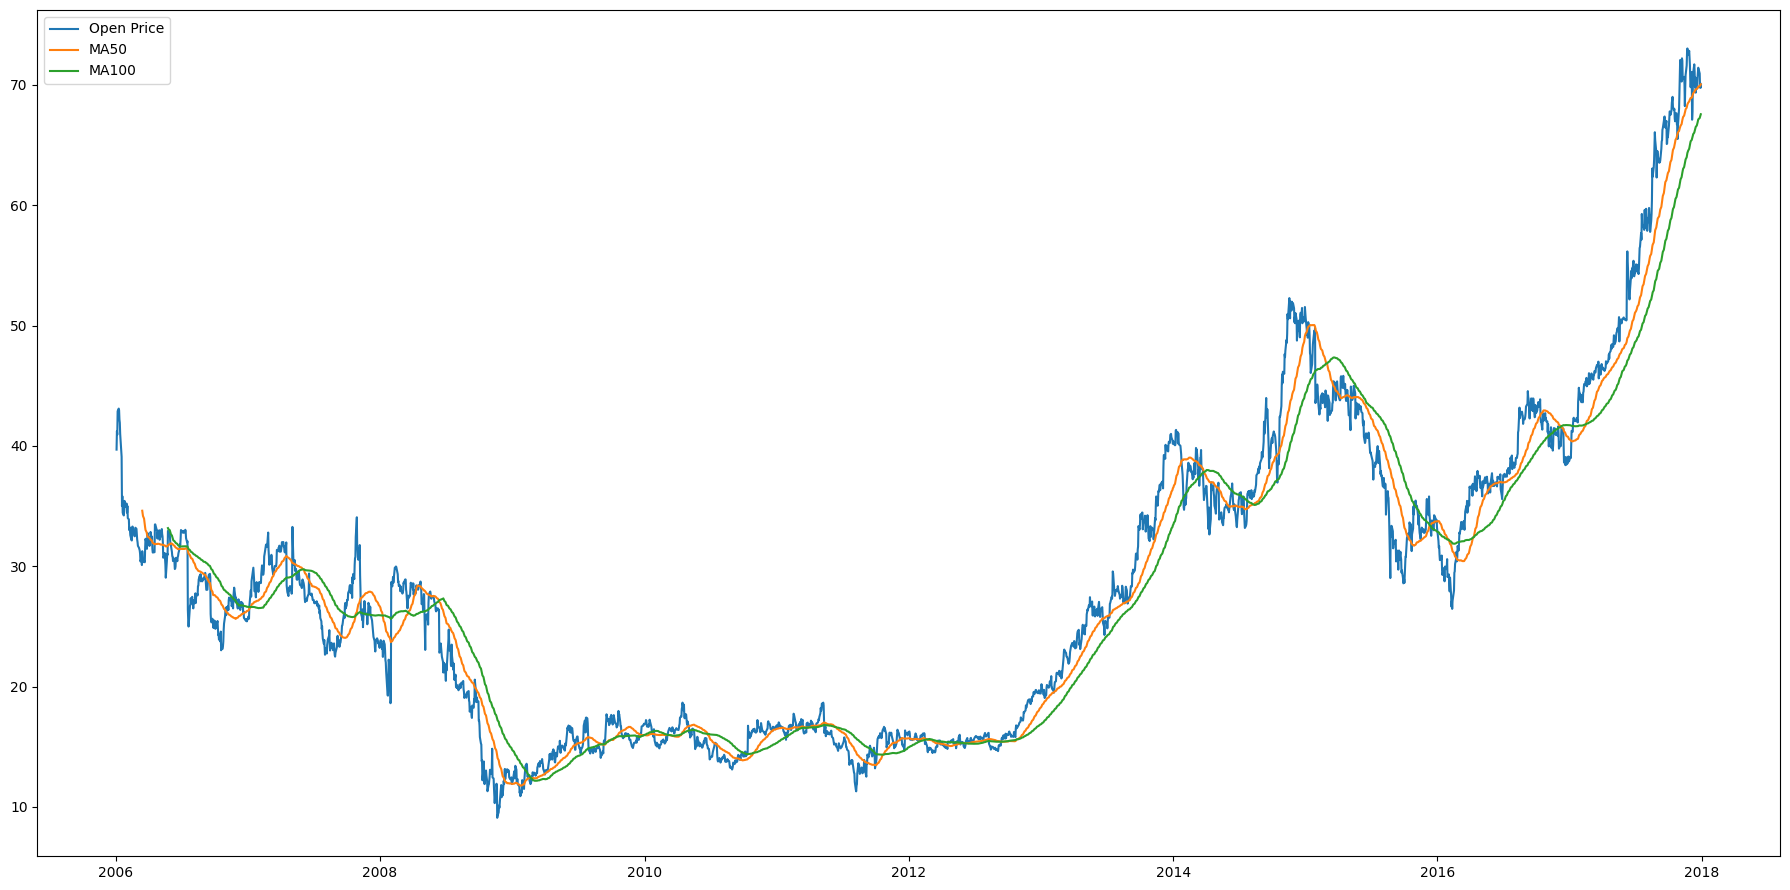

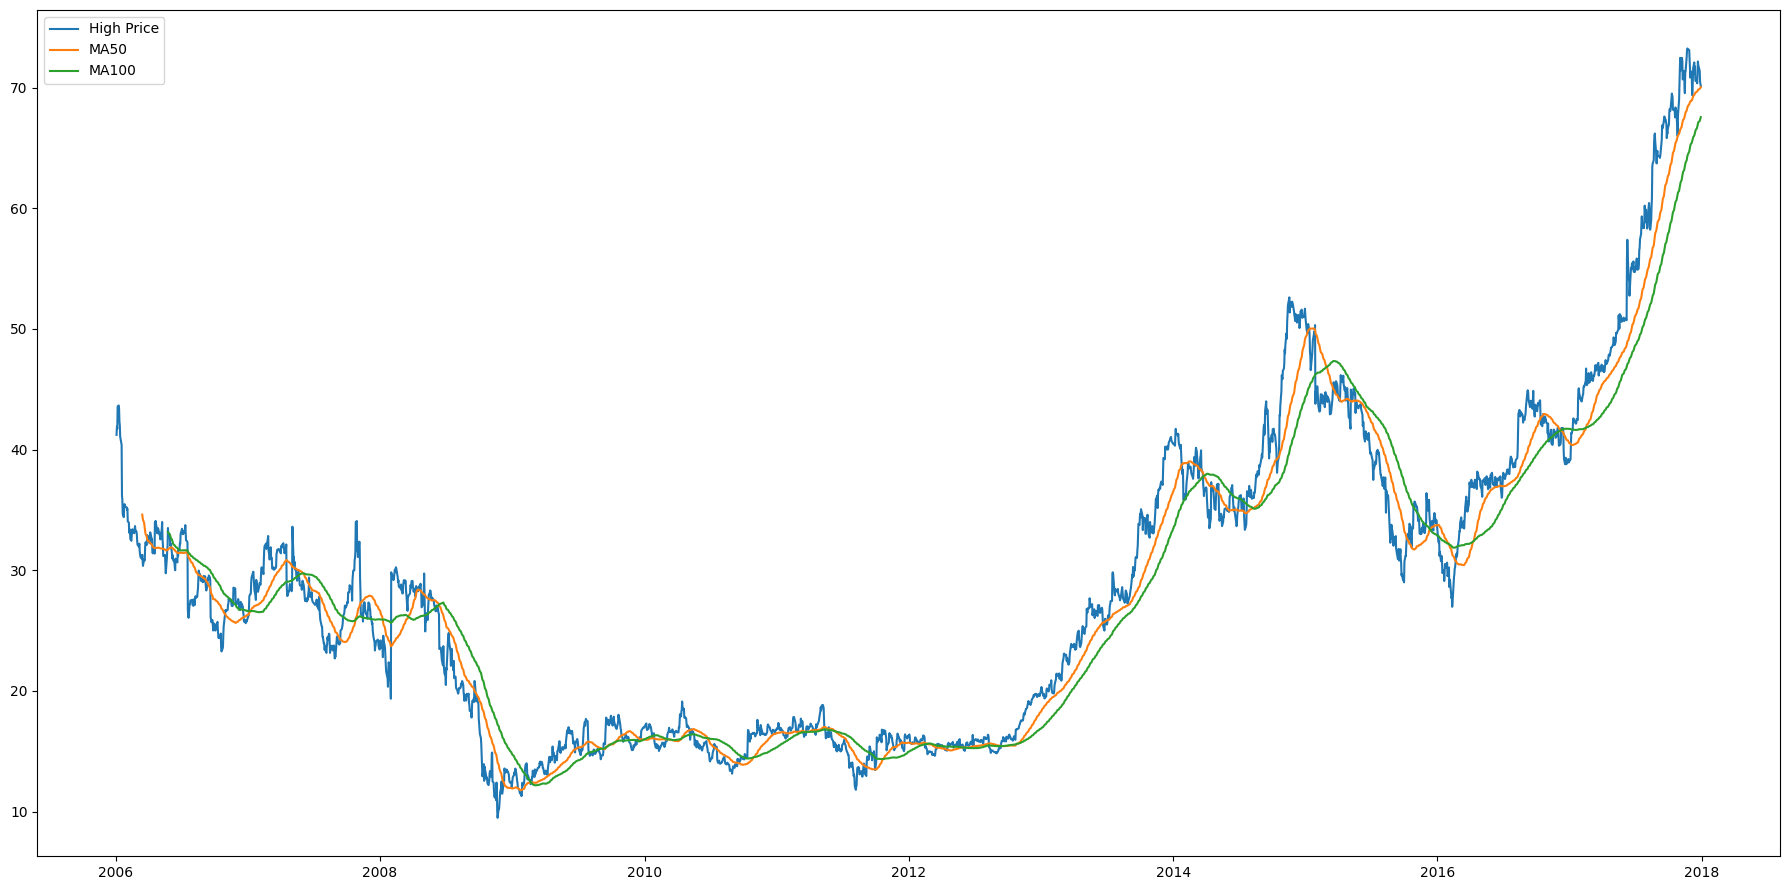

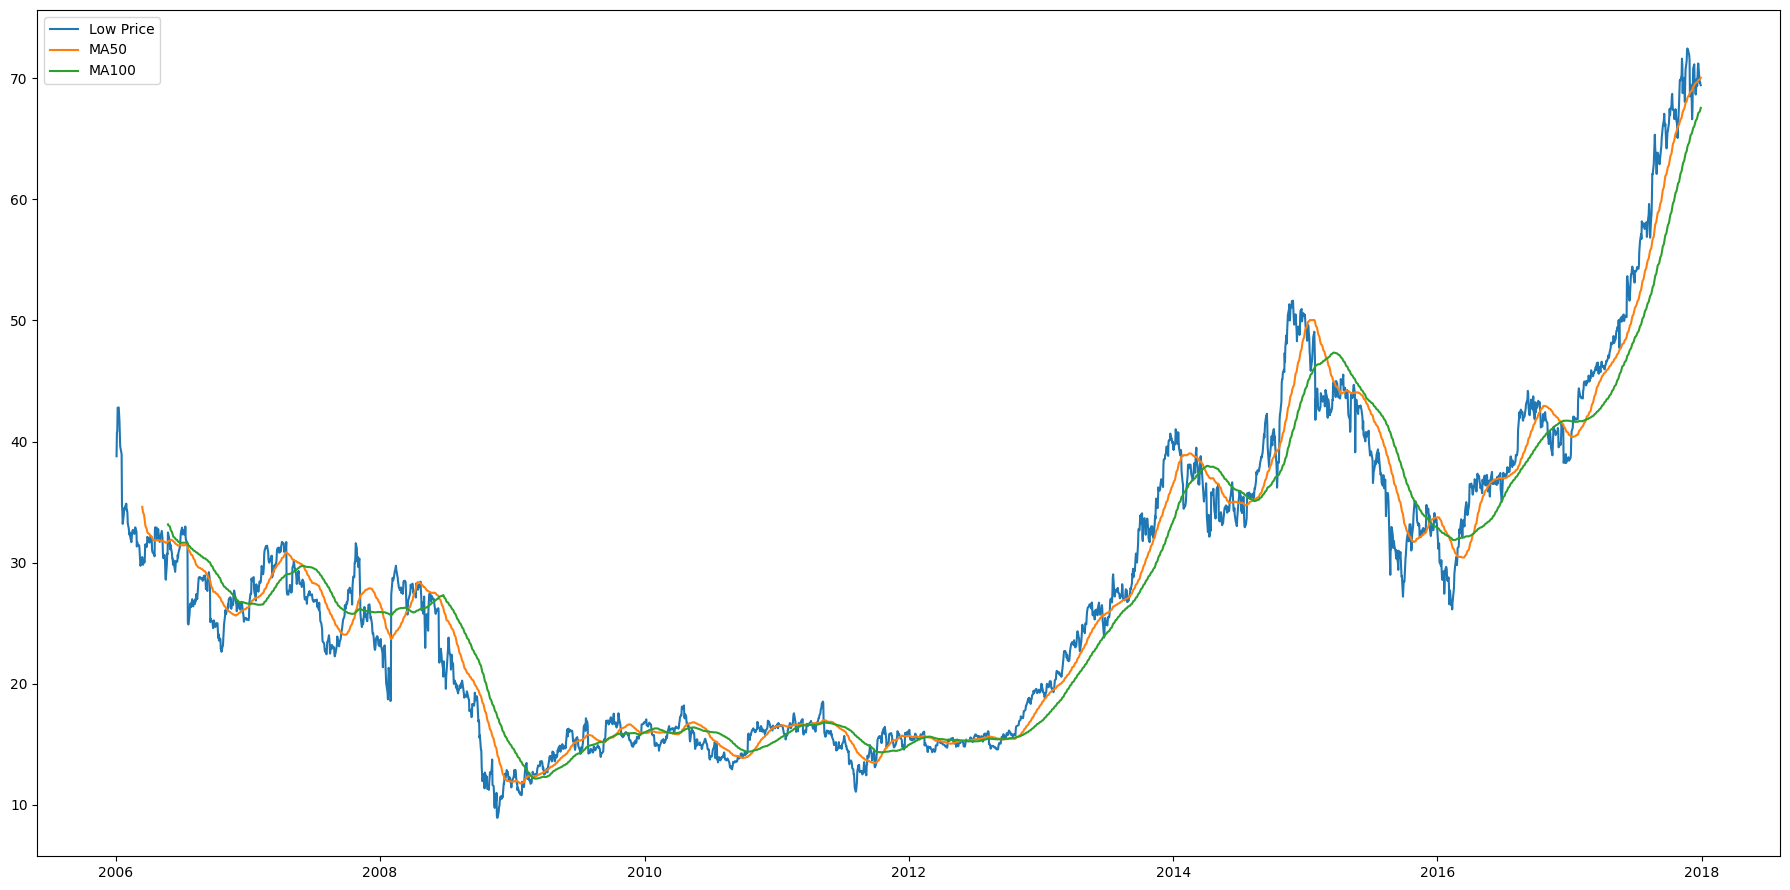

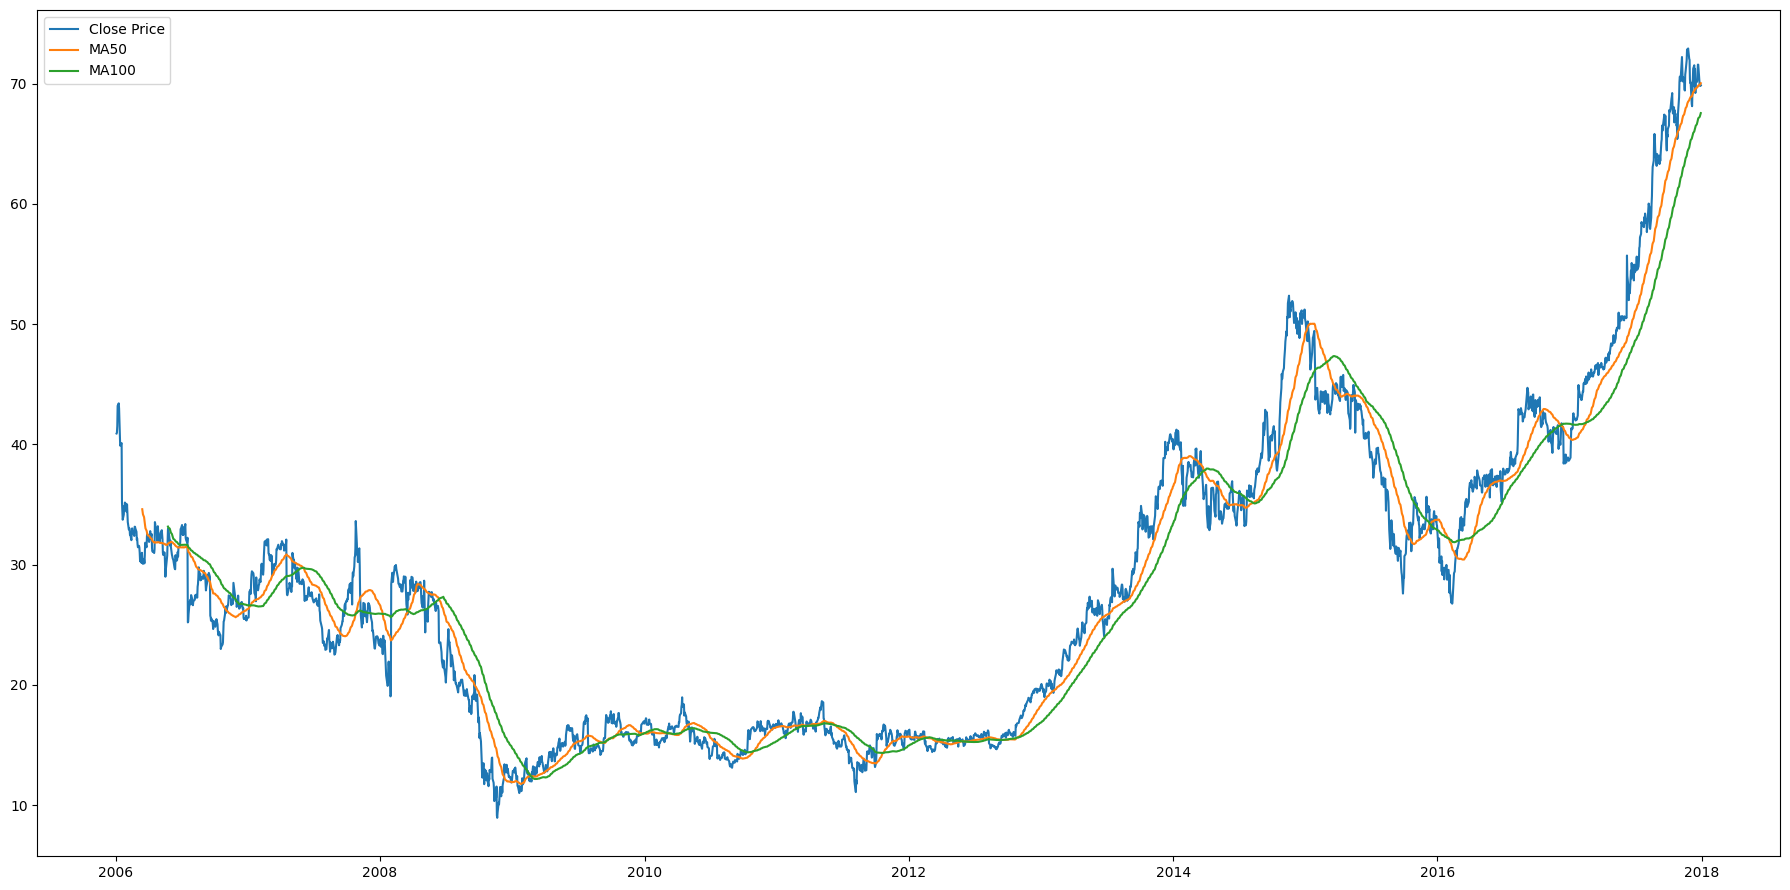

In [118]:
for col in ['Open', 'High', 'Low', 'Close']:
    ma_50_100(df, col)

### Adding Daily Return

In [119]:
df['Daily_Return'] = df['Close'].pct_change()
df.head(2)

,Open,High,Low,Close,Volume,MA_50,MA_100,Daily_Return
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,NaN,NaN,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,NaN,NaN,0.001467


### Daily Return Plots

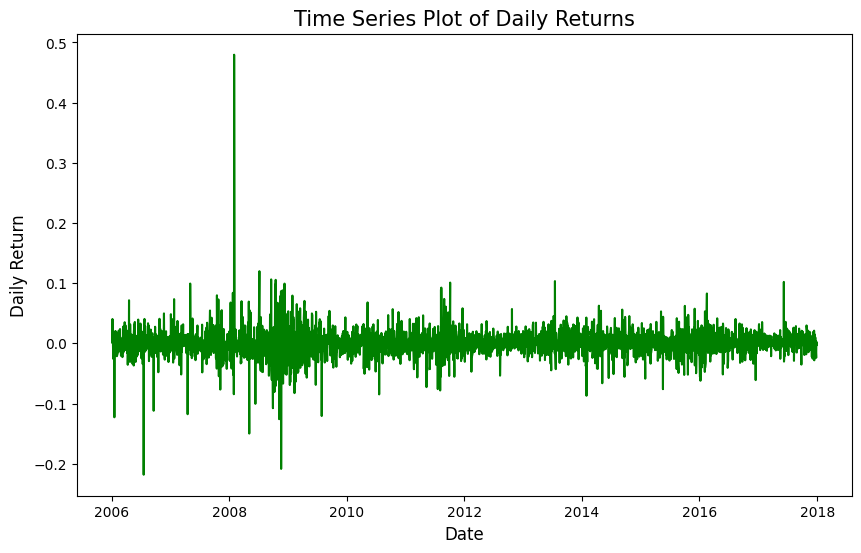

In [122]:
# Daily_Return Time-Series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Daily_Return'], color='green')
plt.title('Time Series Plot of Daily Returns', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.show()

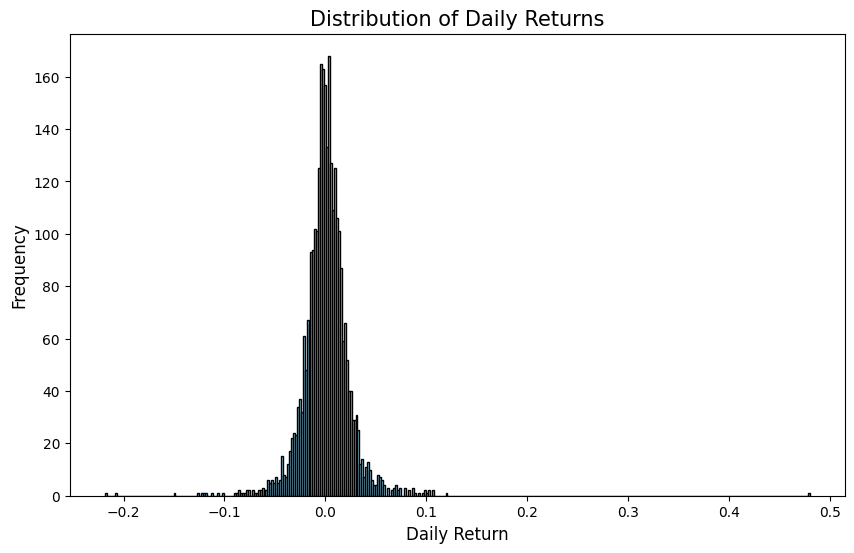

In [124]:
# Distribution of Daily_Return
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Return'], bins=360, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns', fontsize=15)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Season Decomposition

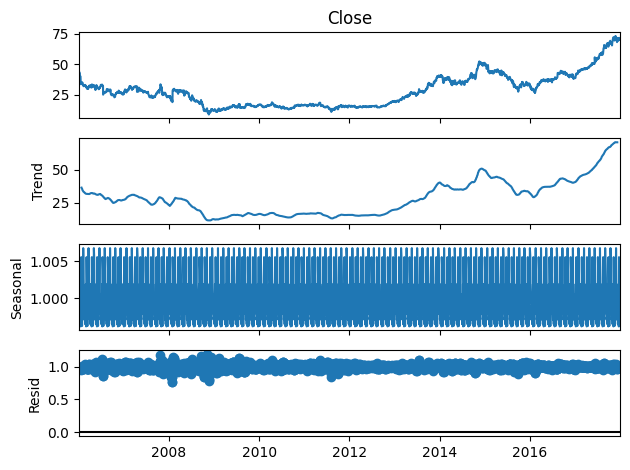

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

### Volume Plots

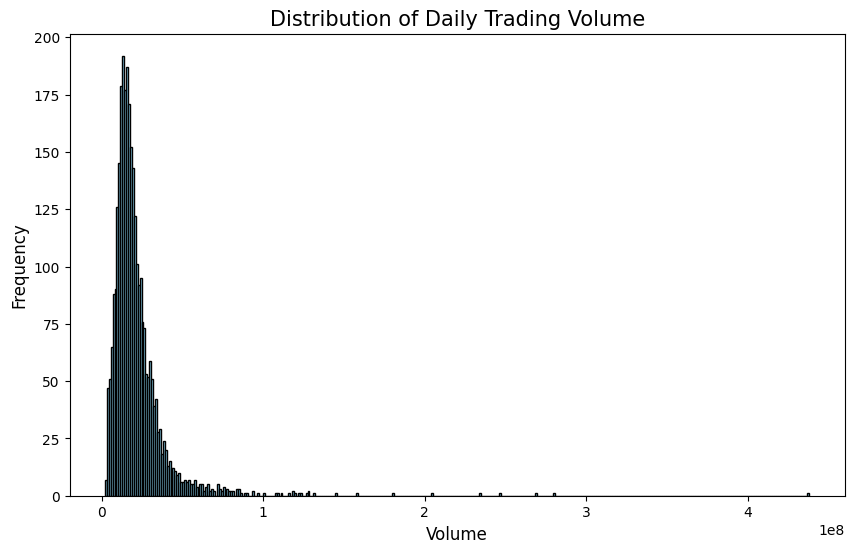

In [130]:
# Distribution of Volume
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=365, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Trading Volume', fontsize=15)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

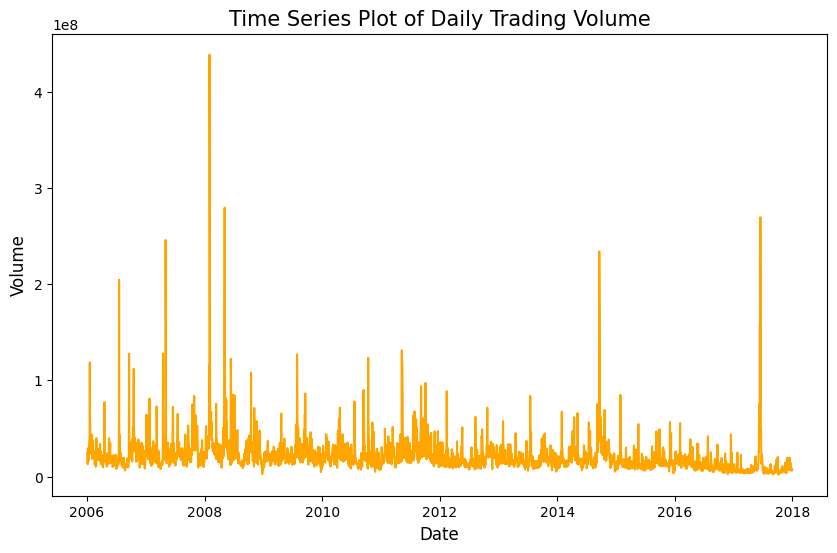

In [131]:
# Time-Series of Volume
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], color='orange')
plt.title('Time Series Plot of Daily Trading Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show()

### Volume Trend With MA

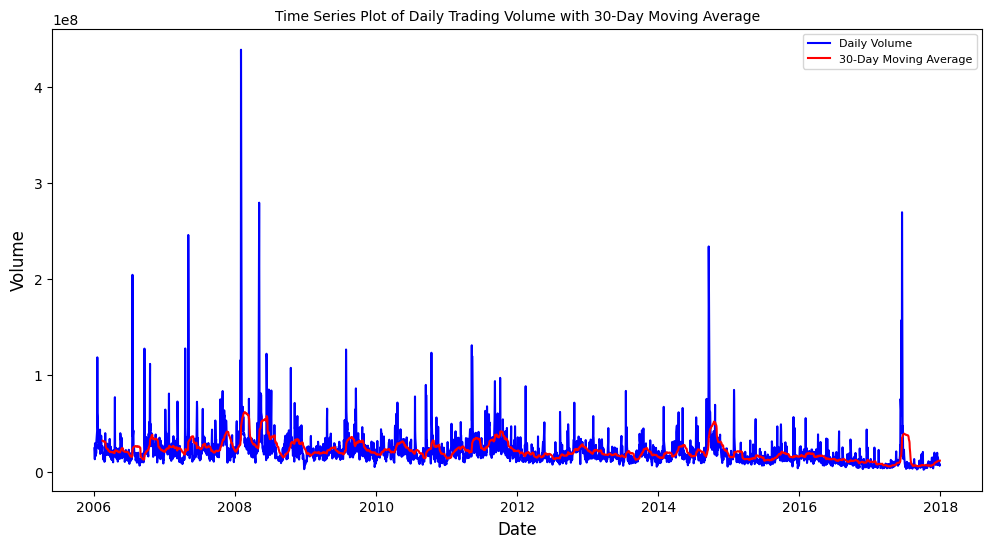

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], color='blue', label='Daily Volume')
plt.plot(df.index, df['Volume'].rolling(window=30).mean(), color='red', label='30-Day Moving Average')
plt.title('Time Series Plot of Daily Trading Volume with 30-Day Moving Average', fontsize=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(fontsize=8)
plt.show()

### Volume Percentage Change

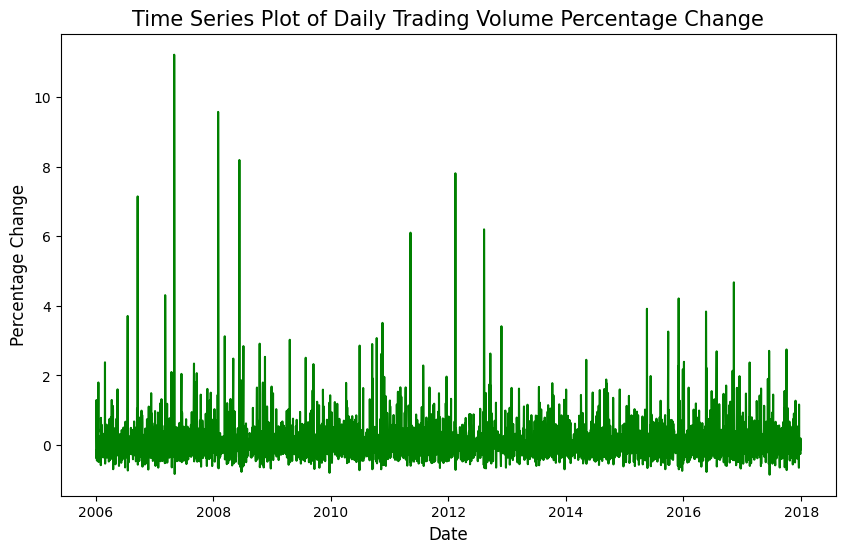

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'].pct_change(), color='green')
plt.title('Time Series Plot of Daily Trading Volume Percentage Change', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)
plt.show()

# Inferential Analysis

### Factor Analysis

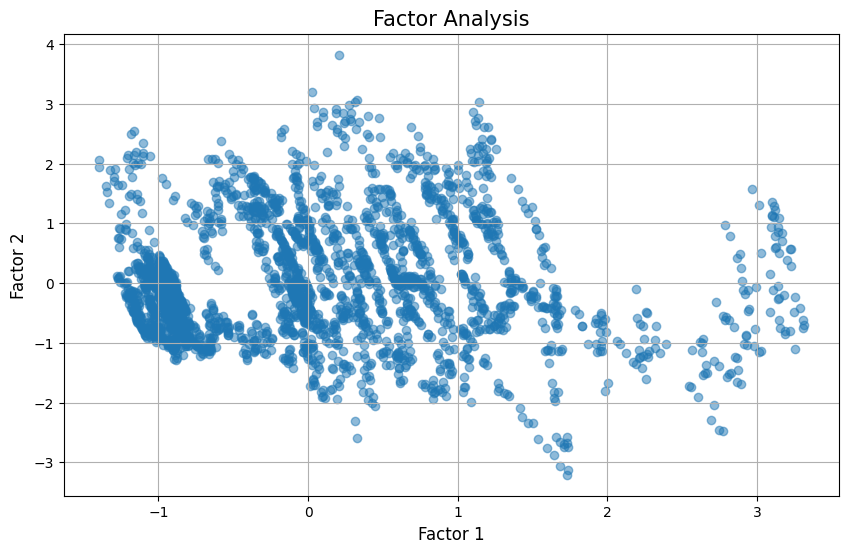

In [154]:
from sklearn.decomposition import FactorAnalysis

X = df.drop(columns=['Volume'])
fa = FactorAnalysis(n_components=2)
X_transformed = fa.fit_transform(X.dropna())

# نمودار داده‌های تجزیه و تحلیل عاملی
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5)
plt.xlabel('Factor 1', fontsize=12)
plt.ylabel('Factor 2', fontsize=12)
plt.title('Factor Analysis', fontsize=15)
plt.grid(True)
plt.show()

### Analysis Of Mean

In [157]:
# میانگین و انحراف معیار حجم معاملات روزانه
mean_volume = df['Close'].mean()
std_volume = df['Close'].std()

print("Average Close Price: ", mean_volume)
print("Standard Deviation Of Close Price: ", std_volume)


Average Close Price:  28.412726068234516
Standard Deviation Of Close Price:  13.25816323630151


In [155]:
np.random.seed(42)

# Number of Samples and Sample size of 'Close' feature
num_sample = 10
sample_size = 100

# Recording data
sample_means = []
confidence_intervals = []
confidence_levels = []
pop_mean_estimators = []

# Generate and Analyze Samples
for _ in range(num_sample):
    # Generate a random sample
    sample = np.random.choice(df['Close'], sample_size, replace=True)

    # Calculate means
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

    # Calculate Standard Error
    standard_error = stats.sem(sample)
    # Caculate Margin of Error
    cl = 0.95
    margin_of_error = stats.norm.ppf((1 + cl) / 2) * standard_error
    # Confidence Interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    confidence_intervals.append(confidence_interval)

# Print results
for i in range(num_sample):
    print(f"Sample {i + 1}:")
    print(f"  Sample Mean: {sample_means[i]}")
    print(f"  Margin of Error: {margin_of_error}")
    print(f"  Confidence Interval: {confidence_intervals[i]}\n")

Sample 1:
  Sample Mean: 29.7024
  Margin of Error: 2.3740723430776853
  Confidence Interval: (26.7831212935594, 32.621678706440605)

Sample 2:
  Sample Mean: 26.357
  Margin of Error: 2.3740723430776853
  Confidence Interval: (23.85587631303542, 28.85812368696458)

Sample 3:
  Sample Mean: 29.0919
  Margin of Error: 2.3740723430776853
  Confidence Interval: (26.26904884560926, 31.91475115439074)

Sample 4:
  Sample Mean: 28.356400000000004
  Margin of Error: 2.3740723430776853
  Confidence Interval: (25.627060780865648, 31.08573921913436)

Sample 5:
  Sample Mean: 27.499900000000004
  Margin of Error: 2.3740723430776853
  Confidence Interval: (24.807619332047505, 30.192180667952503)

Sample 6:
  Sample Mean: 27.549199999999995
  Margin of Error: 2.3740723430776853
  Confidence Interval: (24.934943754790375, 30.163456245209616)

Sample 7:
  Sample Mean: 26.265900000000006
  Margin of Error: 2.3740723430776853
  Confidence Interval: (23.33161106361544, 29.20018893638457)

Sample 8:
  Sa

In [159]:
estimate_pop_mean = np.mean(sample_means)
estimate_pop_std = np.std(sample_means)
population_mean_ci = stats.norm.interval(cl, loc=estimate_pop_mean, scale=estimate_pop_std)
print(f"Estimate Mean of Population: {estimate_pop_mean}")
print(f"Confidence Interval: {population_mean_ci}")
print(f"True Population Mean: {np.mean(df['Close'])}")

Estimate Mean of Population: 28.340819999999997
Confidence Interval: (25.54155740335319, 31.140082596646806)
True Population Mean: 28.412726068234516


### Hypothesis Test Of Mean

In [164]:

# One-Sample ttest
t_stats, p_value = stats.ttest_1samp(sample_means, np.mean(df['Close']))
# Alpha
alpha = 0.05

# Print results
print(f"T-statistic: {t_stats}")
print(f"P-value: {p_value}")

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the estimated population mean is different from the true population mean.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference between the estimated and true population means.")

T-statistic: -0.15103974615853272
P-value: 0.8832755619920517
Fail to reject the null hypothesis. There is not enough evidence to suggest a difference between the estimated and true population means.
